In [187]:
from pymongo import MongoClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (30, 15)

Populating the interactive namespace from numpy and matplotlib


In [188]:
# Database Parameters
db_name = 'squall'  # Name of Application
coll_name = 'Fibonacci Demo'  # Name of Experiment

In [189]:
# Connect to database and extract collection
client = MongoClient("localhost", 27017)
db = client[db_name]
coll = db[coll_name]

In [190]:
# Construct DataFrame
results = pd.DataFrame(np.array([(job['Product'],
                                  job['params']['A']*job['params']['B'],
                                  job['cpuA'] + job['cpuB'],
                                  job['params']['A'],
                                  job['fibA'],
                                  job['cpuA'],
                                  job['params']['B'],
                                  job['fibB'],
                                  job['cpuB']) 
                                 for job in coll.find()]),
                       columns=['product', 'AxB', 'cpu',
                                'A', 'fibA', 'cpuA',
                                'B', 'fibB', 'cpuB'])

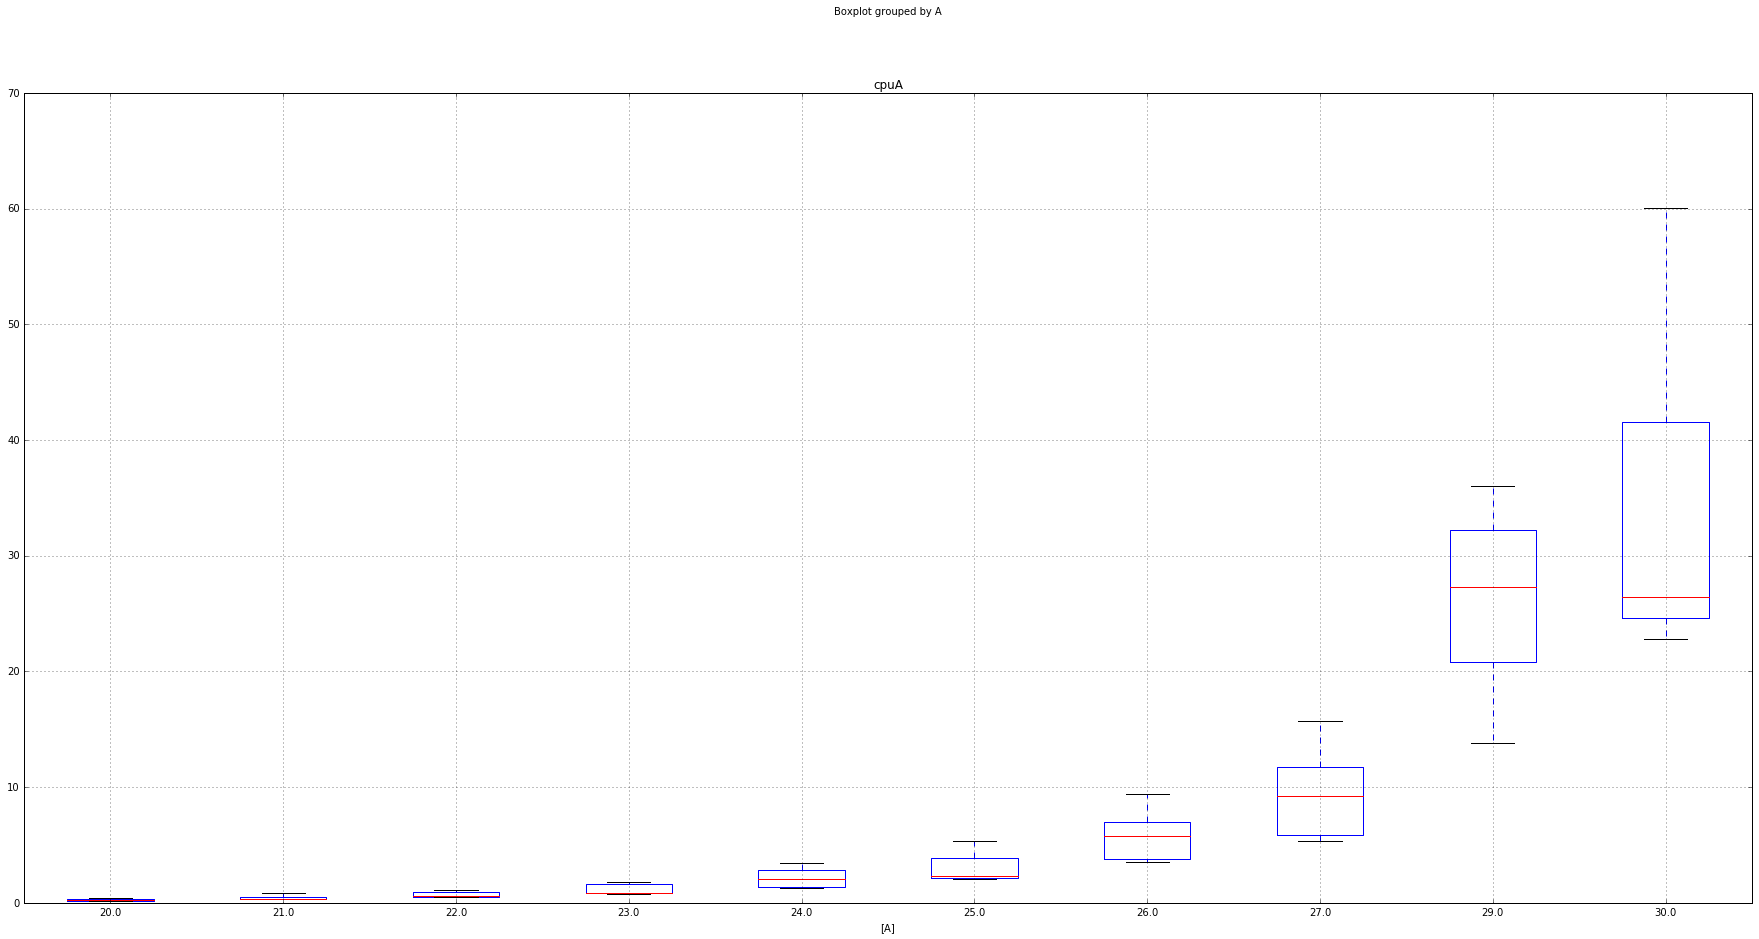

In [192]:
results.boxplot(by =['A'], column='cpuA')
plt.show()

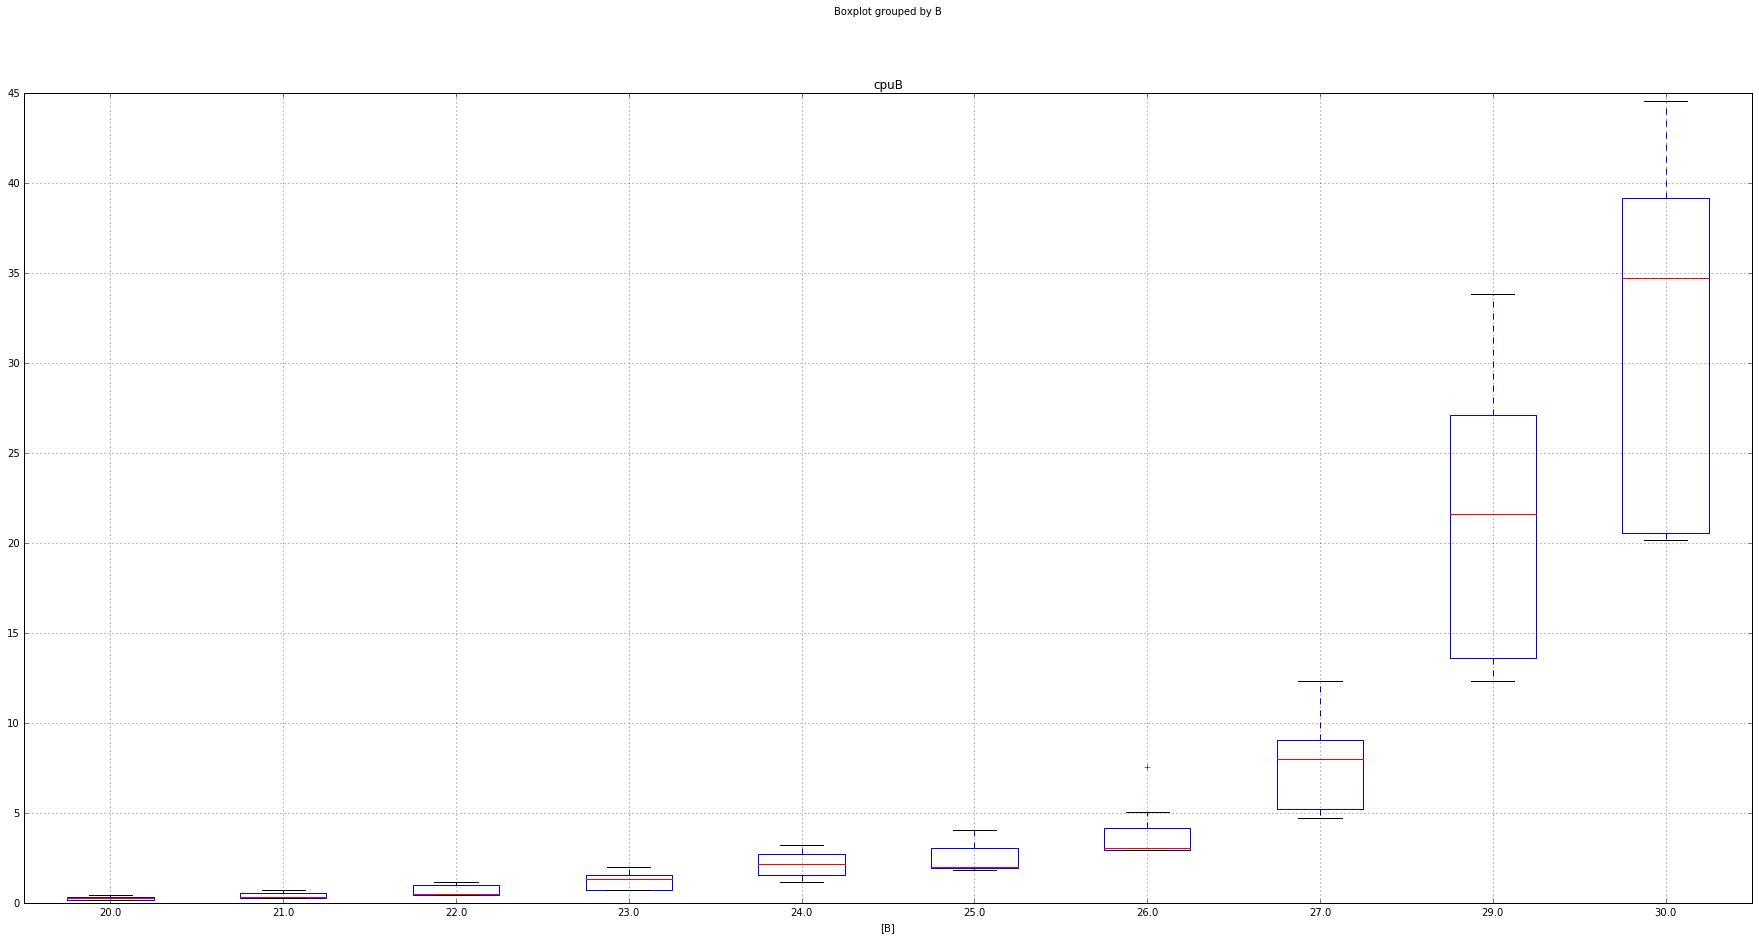

In [193]:
results.boxplot(by =['B'], column='cpuB')
plt.show()

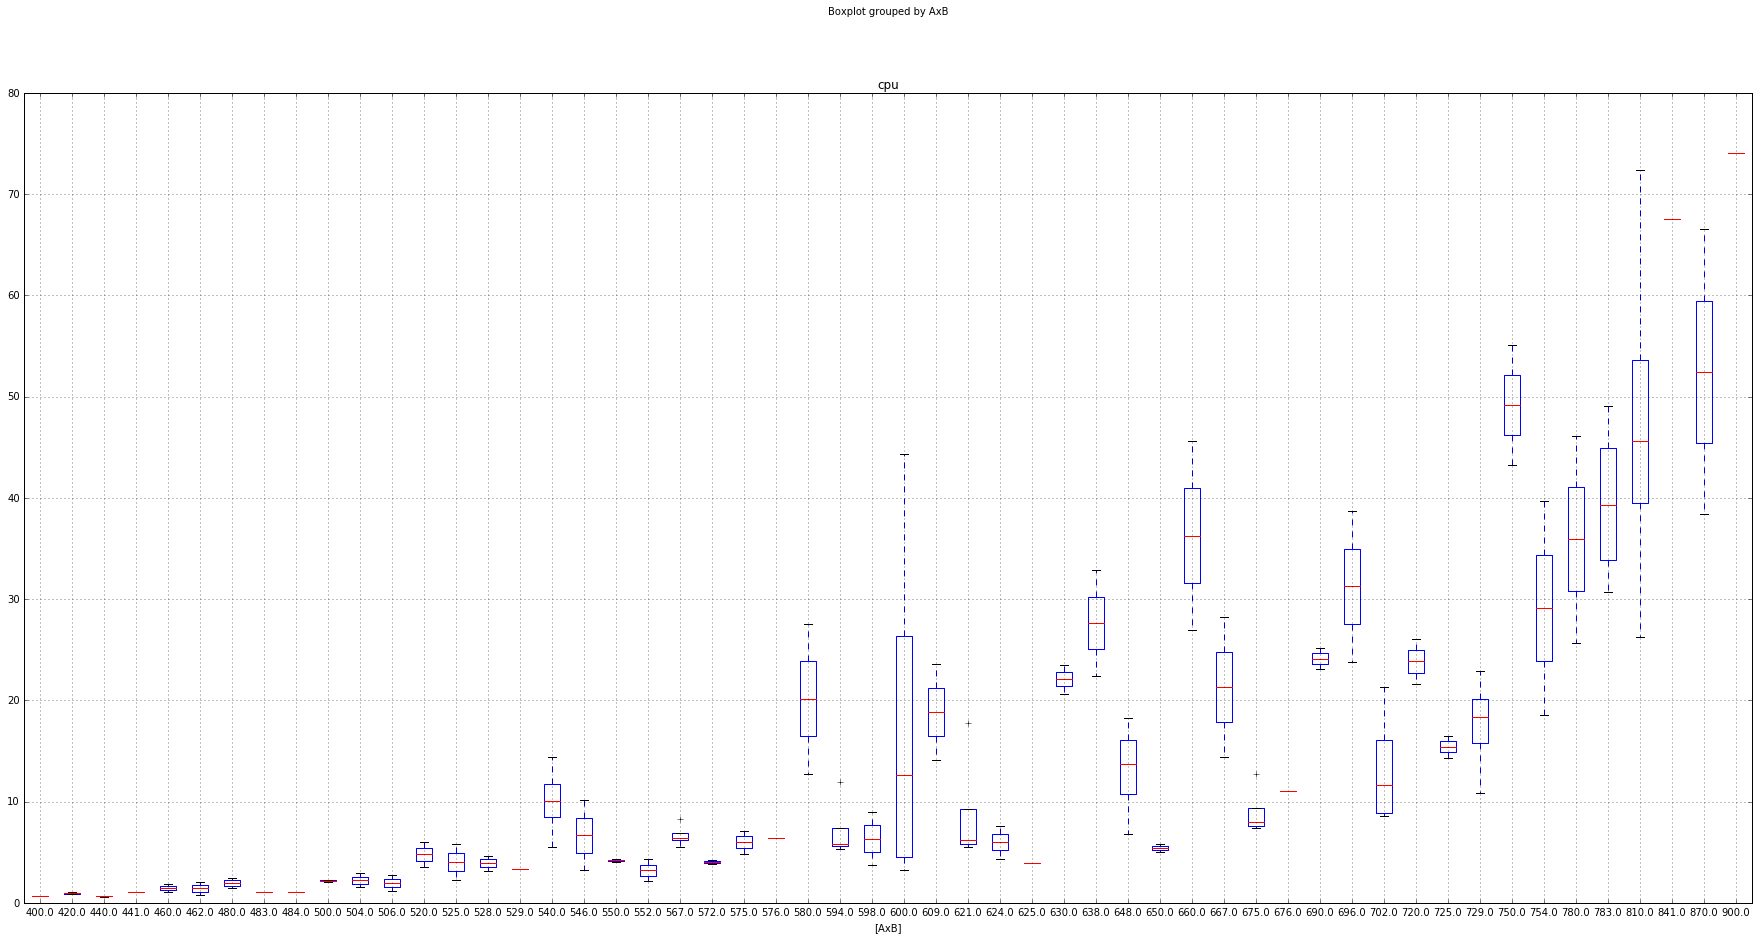

In [194]:
results.boxplot(by=['AxB'], column='cpu')
plt.show()

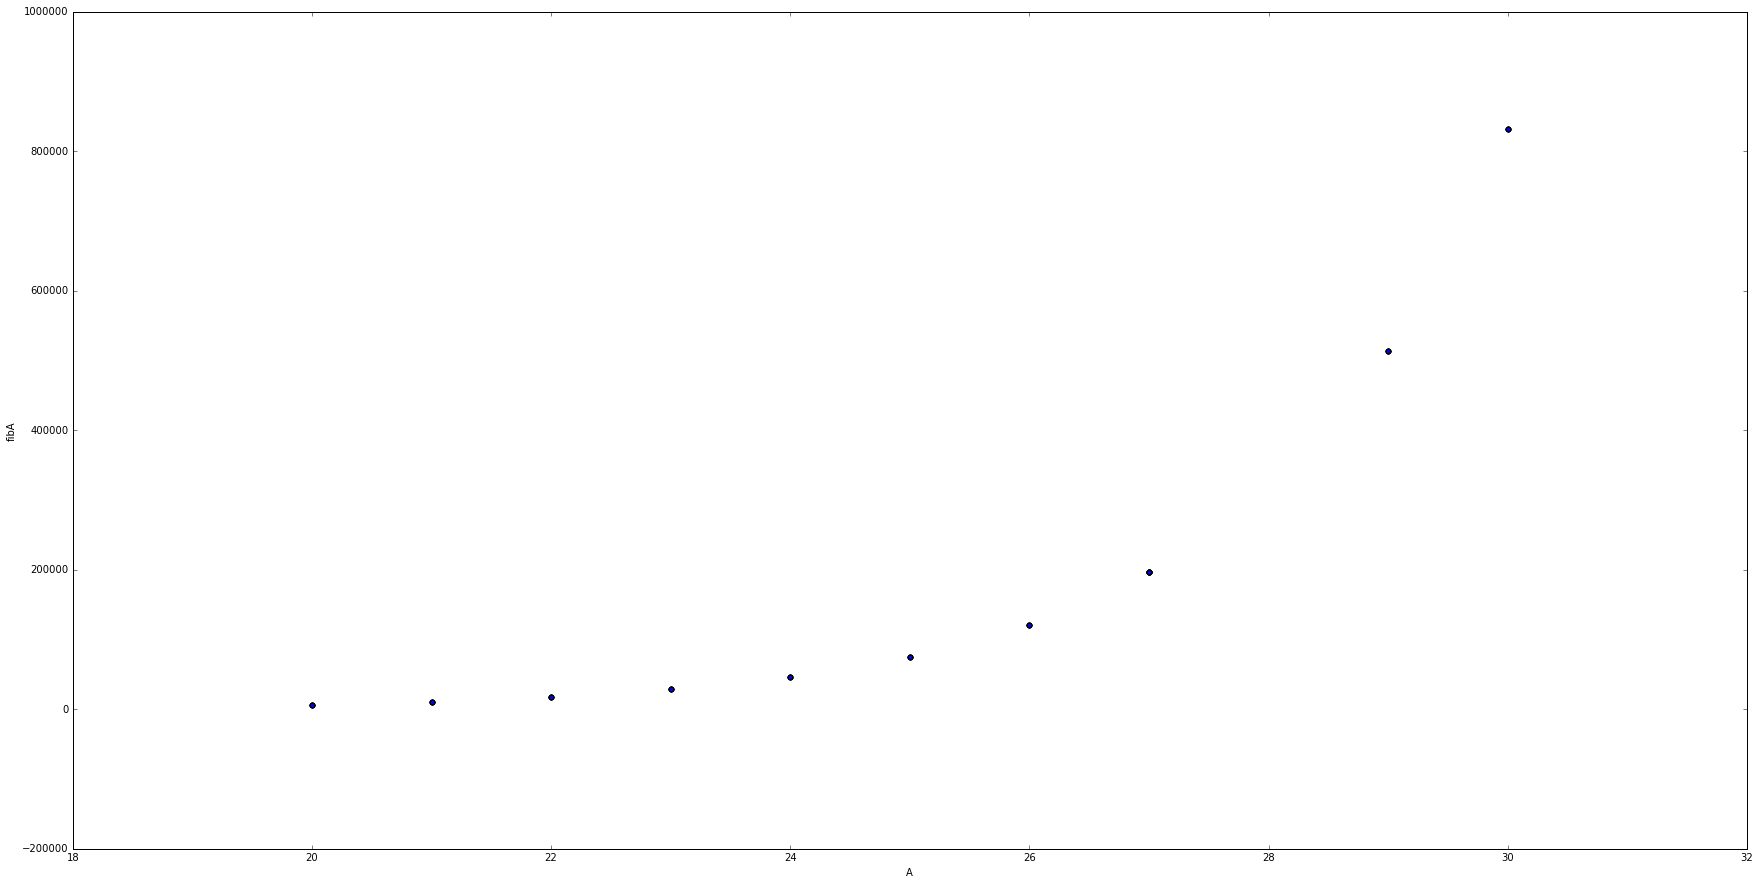

In [195]:
results.plot(kind='scatter', x='A', y='fibA')
plt.show()

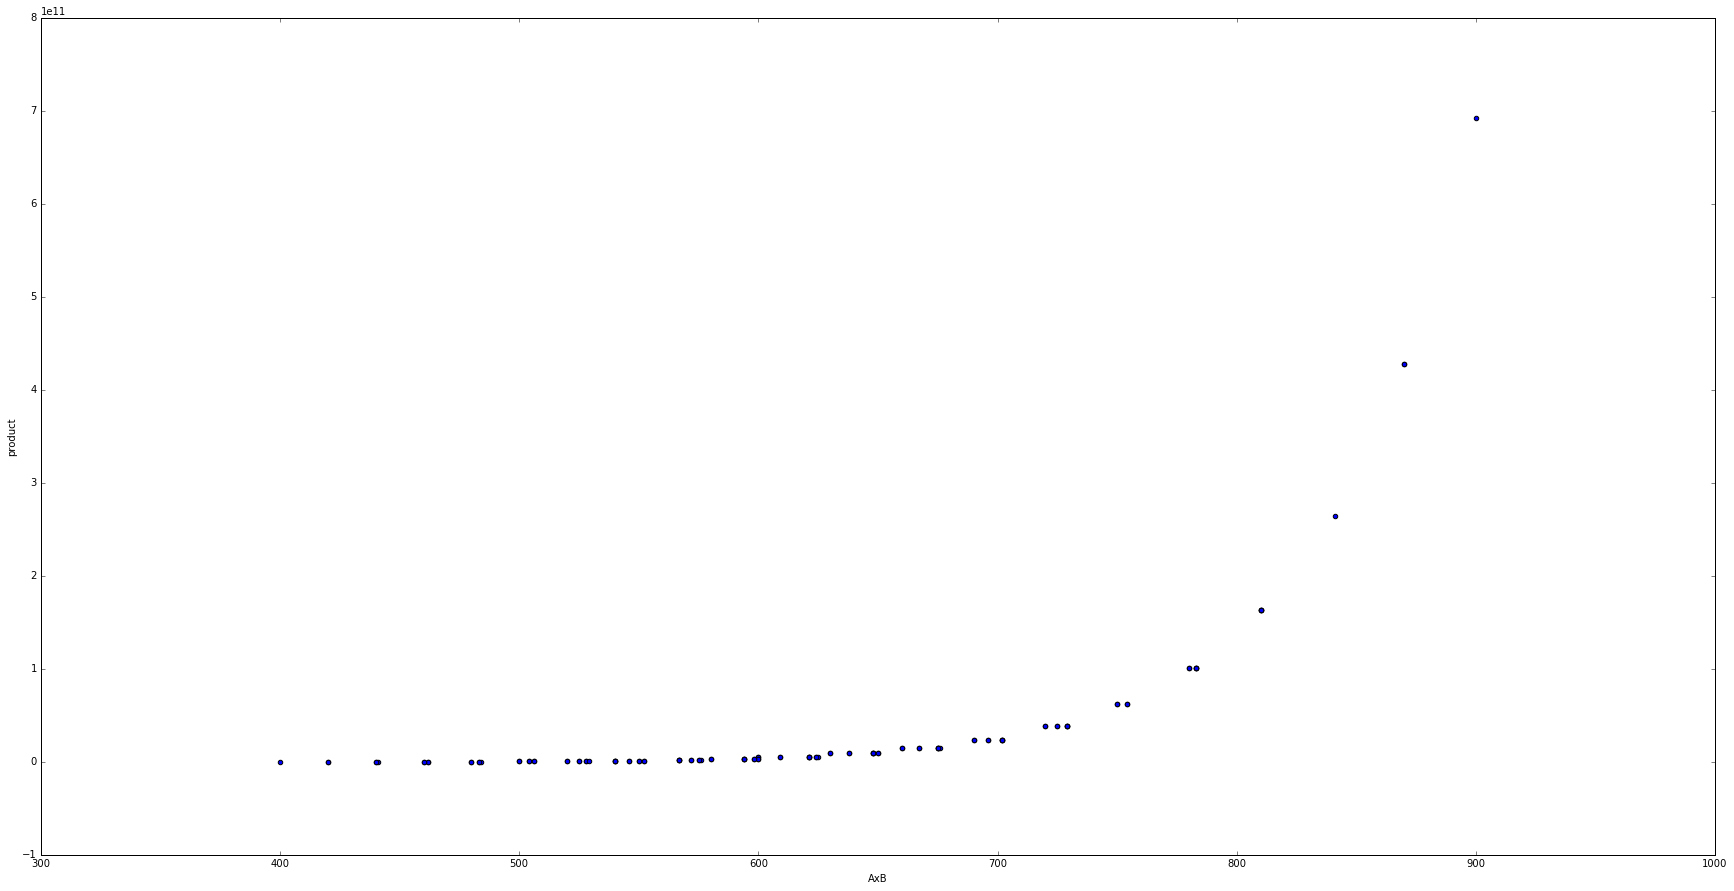

In [196]:
results.plot(kind='scatter', x='AxB', y='product')
plt.show()